In [66]:
import pickle
import numpy as np

In [67]:
# Copy the the file form the results folder of the experiment you want to analyze
with open('nonnested_cval_mltsatt_l819.pkl', 'rb') as f:
    results = pickle.load(f)

In [68]:
# Take the mean and std of our metrics acrross the 10 folds
roc = []
fp = []
for i in range(10):
    roc.append(results[i]["roc"])
    fp.append(results[i]["fp"])


mean_roc = np.array(roc).mean()
std_roc = np.array(roc).std()
mean_fp = np.array(fp).mean()
std_fp = np.array(fp).std()

print(f"ROC: {np.mean(roc):.3f} +/- {np.std(roc):.3f}")
print(f"FP: {np.mean(fp):.3f} +/- {np.std(fp):.3f}")

ROC: 0.604 +/- 0.115
FP: 0.359 +/- 0.111


# Figures

In [69]:
import matplotlib.pyplot as plt
import numpy as np

## Fig.1 Oversampling distribution

In [70]:
# Correspond to 100 % of the original data
print(len(results["demographics"]["oversampler_col"]))

# count the number of unique values in the demographics
print(np.unique(results["demographics"]["oversampler_col"], return_counts=True))
print(np.unique(results["demographics"]["label"], return_counts=True))

254
(array(['0Deutsch', '0Français', '1Deutsch', '1Français'], dtype='<U9'), array([96, 47, 82, 29], dtype=int64))
(array(['0', '1'], dtype='<U1'), array([143, 111], dtype=int64))


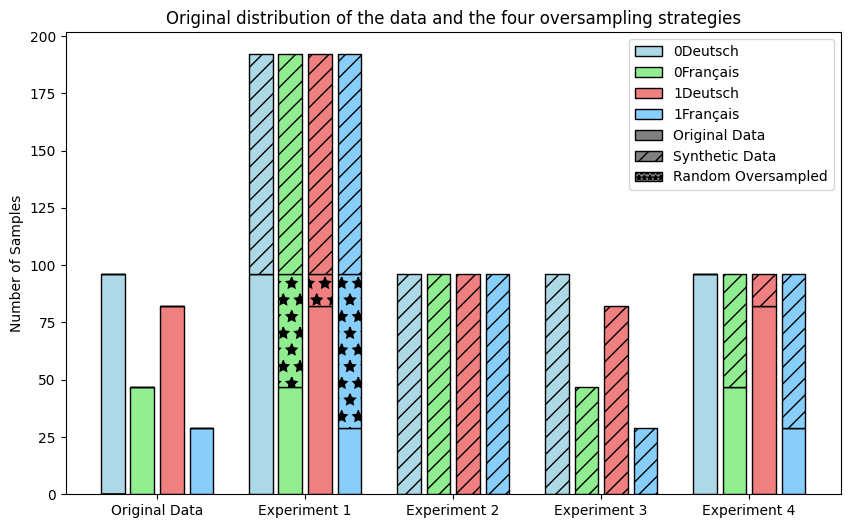

In [72]:
labels = ['0Deutsch', '0Français', '1Deutsch', '1Français']
names = ['Original Data', 'Experiment 1', 'Experiment 2', 'Experiment 3', 'Experiment 4']
group_colors = {'0Deutsch': 'lightblue', '0Français': 'lightgreen', '1Deutsch': 'lightcoral', '1Français': 'lightskyblue'}

experiments = [
    [('0Deutsch', 96), ('0Français', 47), ('1Deutsch', 82), ('1Français', 29)],
    [('0Deutsch', 192), ('0Français', 192), ('1Deutsch', 192), ('1Français', 192)],
    [('0Deutsch', 96), ('0Français', 96), ('1Deutsch', 96), ('1Français', 96)],
    [('0Deutsch', 96), ('0Français', 47), ('1Deutsch', 82), ('1Français', 29)],
    [('0Deutsch', 96), ('0Français', 96), ('1Deutsch', 96), ('1Français', 96)]]
experiments_dict = {f'{names[i]}': dict(experiment) for i, experiment in enumerate(experiments)}

original_counts_dict = dict(experiments[0])
original_max_count = max(dict(experiments[0]).values())
types = [0, 1, 2, 2, 0]

def get_counts(label, type):
    oversampling_count = 0
    if type == 0:
        original_count = original_counts_dict.get(label, 0)
        synthetic_count = counts.get(label, 0) - original_count
    if type == 1:
        original_count = original_counts_dict.get(label, 0)
        oversampling_count = original_max_count - original_count
        synthetic_count = counts.get(label, 0) - original_count - oversampling_count
    if type == 2:
        original_count = 0
        synthetic_count = counts.get(label, 0)
    return original_count , synthetic_count, oversampling_count


plt.figure(figsize=(10, 6))
for i, (name, counts) in enumerate(experiments_dict.items()):
    for j, label in enumerate(labels):
        # Position for each bar in the combined chart
        pos = j + i * (len(labels) + 1)  # Adding a space between experiments

        original_count, synthetic_count, oversampling_count = get_counts(label, types[i])

        # Plotting bars for original and synthetic data
        plt.bar(pos, original_count, color=group_colors[label], edgecolor='black')
        plt.bar(pos, oversampling_count, bottom=original_count , color=group_colors[label], hatch='*', edgecolor='black')
        plt.bar(pos, synthetic_count, bottom=original_count + oversampling_count, color=group_colors[label], hatch='//', edgecolor='black')
        

# Adding x-ticks, labels, and title
plt.xticks([i * (len(labels) + 1) + 1.5 for i in range(len(experiments_dict))], experiments_dict.keys())
plt.ylabel('Number of Samples')
plt.title('Original distribution of the data and the four oversampling strategies')

for label, color in group_colors.items():
    plt.bar(0, 0, color=color, label=label, edgecolor='black')  # Dummy bars for legend
plt.bar(0, 0, color='gray', label='Original Data', edgecolor='black')  # Dummy bar for original data
plt.bar(0, 0, color='gray', hatch='//', label='Synthetic Data', edgecolor='black')  # Dummy bar for synthetic data
plt.bar(0, 0, color='gray', hatch='***', label='Random Oversampled', edgecolor='black') 
plt.legend()


plt.show()